# АиСД-2, 2023, задание 5. Демков Михаил Кириллович БПИ212. Среда разработки - CLion
# Общие графики со всеми сортировками (12 штук)
## Графики для массивов с типом элементов "случайные 0-5" и размерами от 50 до 300.

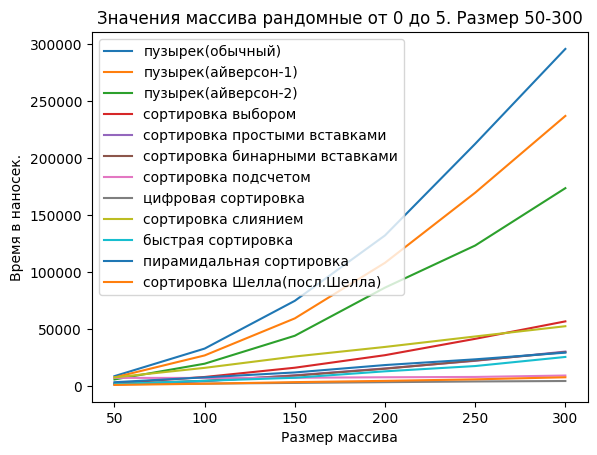

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../tables/time_of_size.csv", sep=';')

random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] <= 300)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Как можно заметить, на графике четко видно, на сколько **пузырьковая сортировка (даже с оптимизациями) медленнее остальных**, а кривые, соответствующие им, напоминают **параболы**. Попробуем вынести некоторые быстрые сортировки на отдельный график, который будет ниже, чтобы увидеть различие.

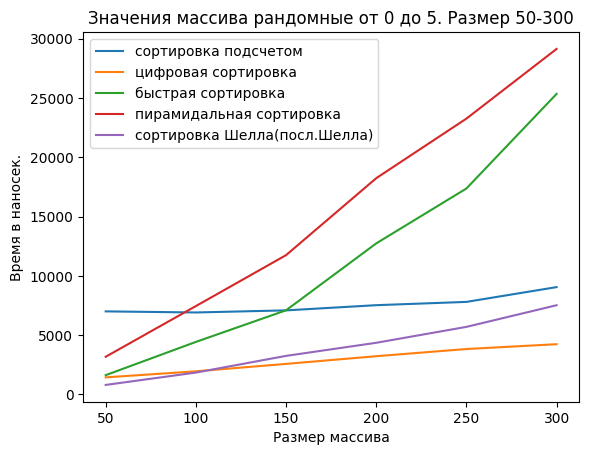

In [22]:
fast_sorts = ['сортировка Шелла(посл.Шелла)', 'пирамидальная сортировка', 'быстрая сортировка', 'цифровая сортировка', 'сортировка подсчетом']

for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Здесь можно заметить, что лучше всего себя показывает цифровая сортировка (судя по кривой можно сказать O(n)), а сортировка подсчетом очень медленно колеблется с изменением размеров массива - и это не странно, потому что для нее сложность всегда гарантирована O(4001), потому что диапазон чисел максимальный 0-4000. Так что неважно какого размера будет массив, цикл все равно пройдет через все 4001 элементов доп массива. Именно поэтому если бы время можно было замерять какими-то эталонными способами без погрешностей, то линия была бы просто параллельна оси Ox

## График для массивов с типом элементов "случайные 0-5" и размерами от 400 до 4100.

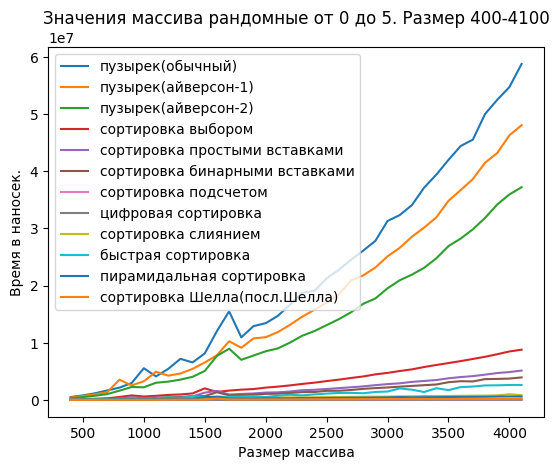

In [23]:
random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] >= 400)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 400-4100')

plt.legend()

plt.show()

Сразу выделим быстрые сортировки по аналогии с тем, что я делал раньше. (результат ниже)
Выборка стала больше, теперь можно увидеть, что у всех сортировок появляются "выбросы". Связано это с тем, что при замерах времени процессором выполняется большое число других вычислительных операций, а замерять время "в вакууме" не представляется возможным в домашних условиях. Но главное заметить общую тенденцию - ожидаемая сложность на произвольных массивах соотвествует заявленной

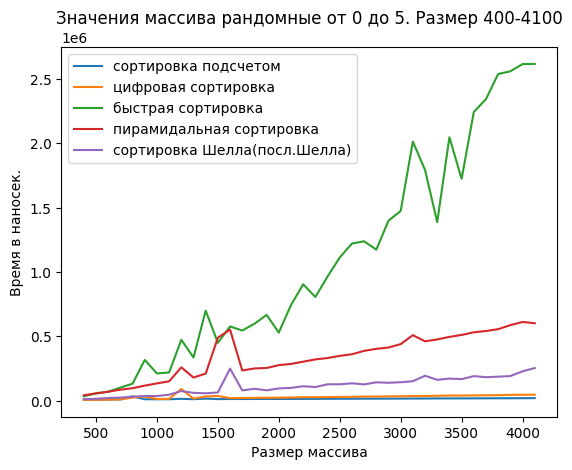

In [24]:
for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 400-4100')

plt.legend()

plt.show()

Меньше всего (если сравнивать с остальными) "скачет" сортировка подсчетом - это достаточно ожидаемо

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 50 до 300.

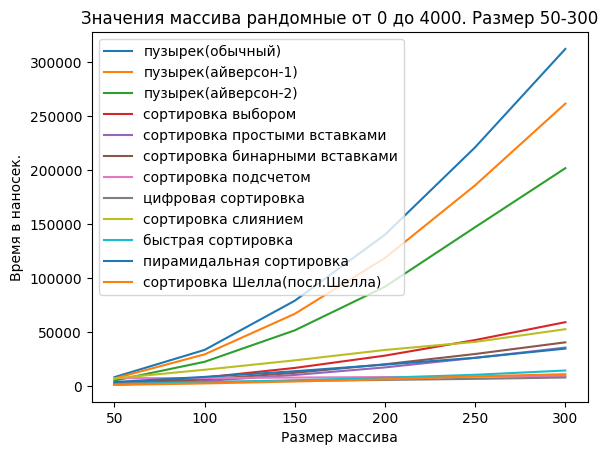

In [25]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] <= 300)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 4000. Размер 50-300')

plt.legend()

plt.show()

Здесь сложно увидеть разницу по сравнению с графиком для элементов 0-5, потому что числа не сильно различаются. Посмотрим сразу на более большой выборке

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 400 до 4100.

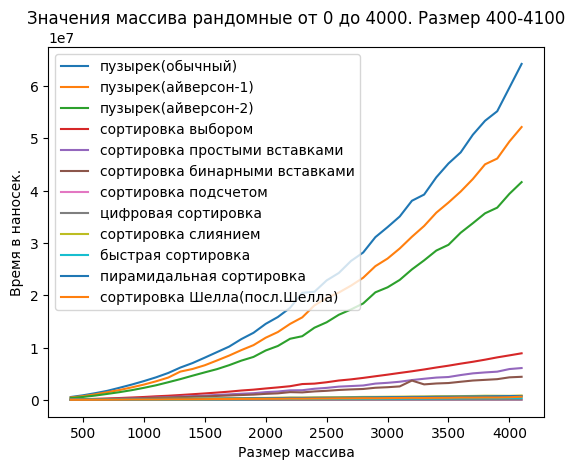

In [26]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] >= 400)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 4000. Размер 400-4100')

plt.legend()

plt.show()

Опять же появляются "вбросы", связанные с несовершенностью проводимых измерений

## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

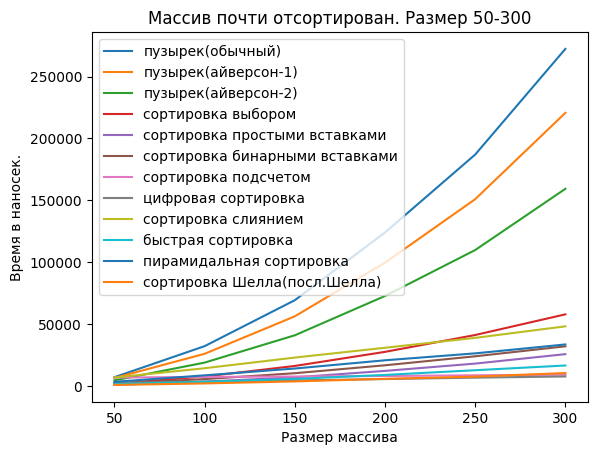

In [27]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] <= 300)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 50-300')

plt.legend()

plt.show()

Тенденции все те же. Пузырьковые сортировки работают дольше всего
## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

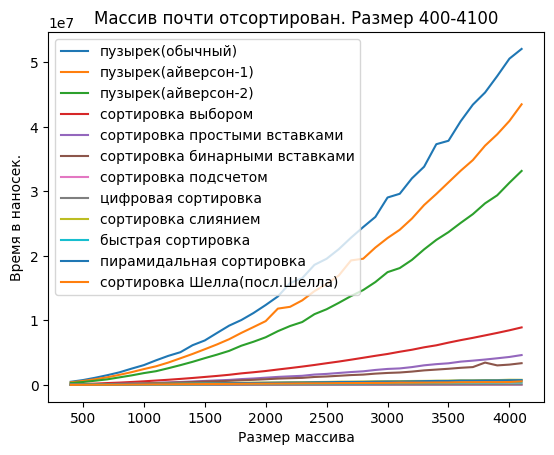

In [28]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] >= 400)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 400-4100')

plt.legend()

plt.show()

Вынесем опять быстрые сортировки на отдельный график

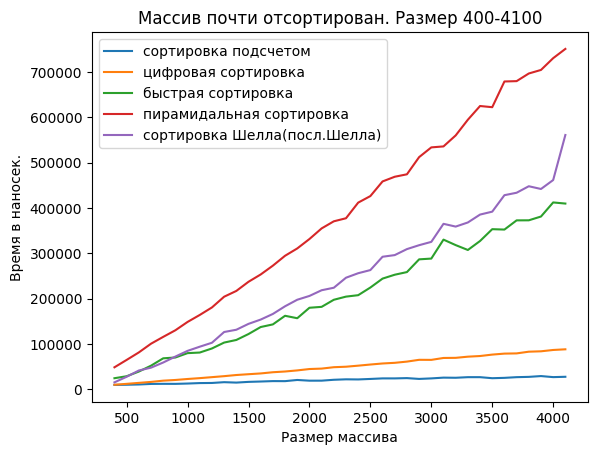

In [30]:
for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 400-4100')

plt.legend()

plt.show()

Видим изменение - если раньше пирамидальная сортировка была лучше быстрой, то сейчас все наоборот. Пирамидальная сортировка гарантировано работает за O(nlogn) неважно на каких данных, а вот быстрая здесь работает чуть быстрее в силу того, что т.к половина массива отсортирована, а за опорный мы берем первый, на первой половине массива не будет совершено ни одной перестановки

## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

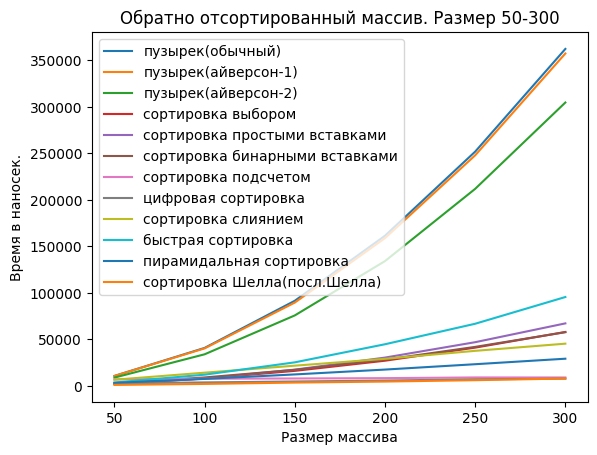

In [31]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] <= 300)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Обратно отсортированный массив. Размер 50-300')

plt.legend()

plt.show()

Обычный пузырек и с 1 условием Айверсона очень схожи, пузырьковая со 2 условием Айверсона не так схожа с другими, но вообще на обратно отсортированных массивах в идеальном мире графики должны полностью совпадать. Сортировка выбором стала работать медленнее в силу особенности ее реализации - на каждой итерации внешнего цикла мы ищем наименьший элемент, который всегда оказывается в конце и мы всегда будем идти до конца неотсортированной (по возрастанию) части массива 
## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

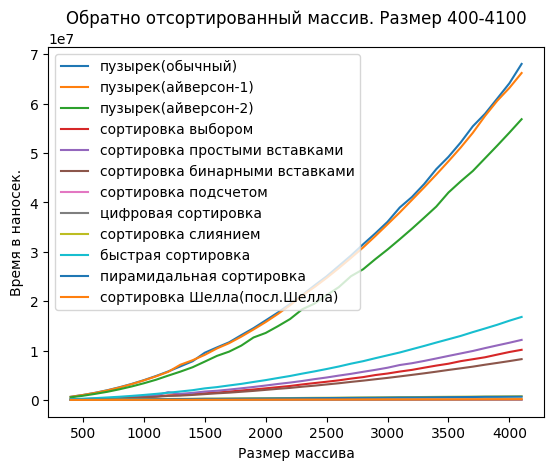

In [32]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] >= 400)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Обратно отсортированный массив. Размер 400-4100')

plt.legend()

plt.show()

Здесь можно увидеть, что медленнее стала сортировка простыми вставками и это логично - ведь чтобы найти место линейным поиском для очередного элемента мы будем двигать все элементы в отсортированной части (т.к каждый новый для нас будет минимальным в уже отсортированной части)

# Построим графики для всех сортировок на массивах размеров 50-300
## Пузырьковая сортировка 

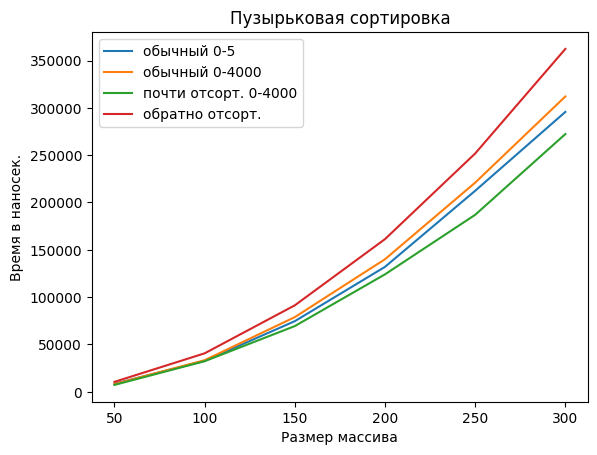

In [35]:
bubbleSort = data[(data['Sorting algorithm'] == 'пузырек(обычный)') & (data['Array size'] <= 300)]

array_types = bubbleSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort[bubbleSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Судя по кривым для всех типов массивов можно сказать, что наблюдается квадратичная зависимость (как и положено простому пузырьку). Худший случай - обратно отсортированный массив и это логично, ведь число обменов в нем наибольшее. Самый лучший вариант - почти отсортированный: это тоже было ожидаемо, т.к число обменов здесь наименьшее
## Пузырьковая сортировка (Айверсон-1)

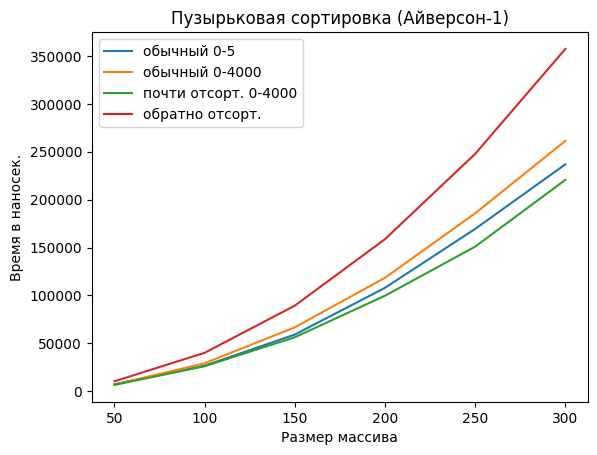

In [36]:
bubbleSort1 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-1)') & (data['Array size'] <= 300)]

array_types = bubbleSort1['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort1[bubbleSort1['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-1)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Здесь как и без оптимизации ожидаемо худшим случаем является обратно отсортированный массив, а лучшим почти отсортированный. Больше смысла анализировать нет, разница должна быть получше ощутима на графиках с элементарными операциями
## Пузырьковая сортировка (Айверсон-2)

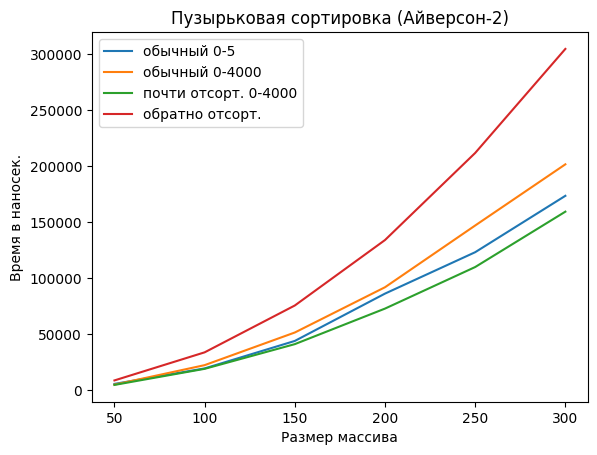

In [37]:
bubbleSort2 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-2)') & (data['Array size'] <= 300)]

array_types = bubbleSort2['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort2[bubbleSort2['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-2)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Как и сказал выше, тут больше нечего комментировать
## Сортировка подсчетом

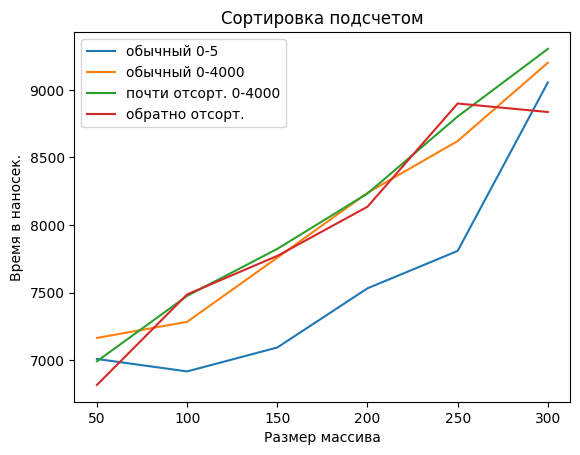

In [38]:
countingSort = data[(data['Sorting algorithm'] == 'сортировка подсчетом') & (data['Array size'] <= 300)]

array_types = countingSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = countingSort[countingSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка подсчетом')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Наблюдаются стабильные выбросы, более ярко выраженные чем, например, в сортировке пузырьком. Это может быть связано с тем, что в сортировке подсчетом выделяется и освобождается память под доп.массив, что сказывается на времени работы алгоритма
## Сортировка выбором

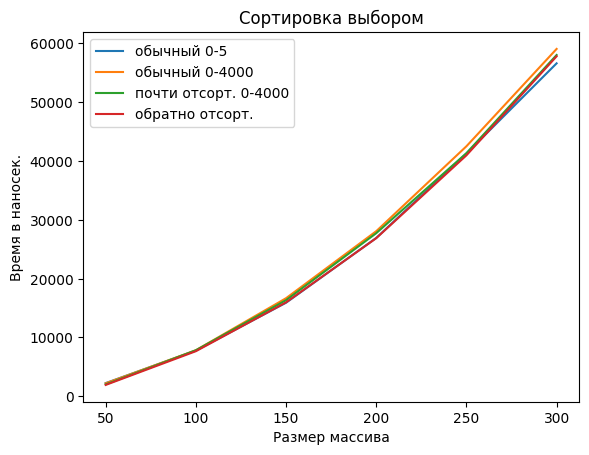

In [39]:
selectionSort = data[(data['Sorting algorithm'] == 'сортировка выбором') & (data['Array size'] <= 300)]

array_types = selectionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = selectionSort[selectionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка выбором')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

На всех видах массива результаты можно сказать приблизительно равны и этого стоило ожидать, потому что мы идем слева направо по неотсортированной части массива и ищем минимум для текущего элемента, проходясь по всей части массива независимо от входных данных и без дополнительных оптимизаций
## Сортировка простыми вставками

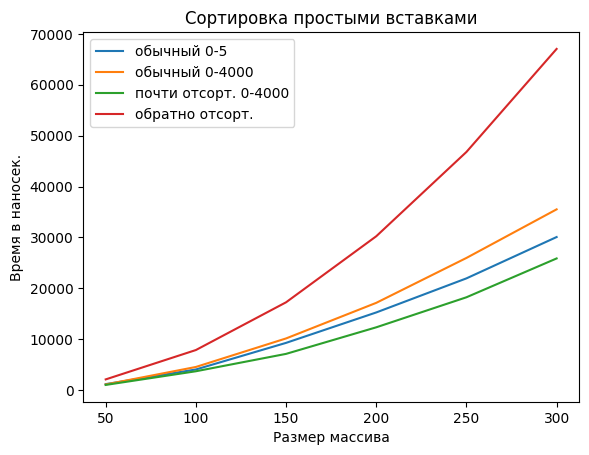

In [40]:
insertionSort = data[(data['Sorting algorithm'] == 'сортировка простыми вставками') & (data['Array size'] <= 300)]

array_types = insertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = insertionSort[insertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка простыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Худший случай - обратно отсортированный массив. И в правду - когда массив отсортирован, чтобы найти место для вставки в отсортированную часть линейным поиском, нам нужно пройти все элементы отсортированной части (т.к тот что мы хотим вставить будет минимальным из всех). Почти отсортированный массив - лучший случай, так как половину элементов мы вообще не будем двигать
## Сортировка бинарными вставками

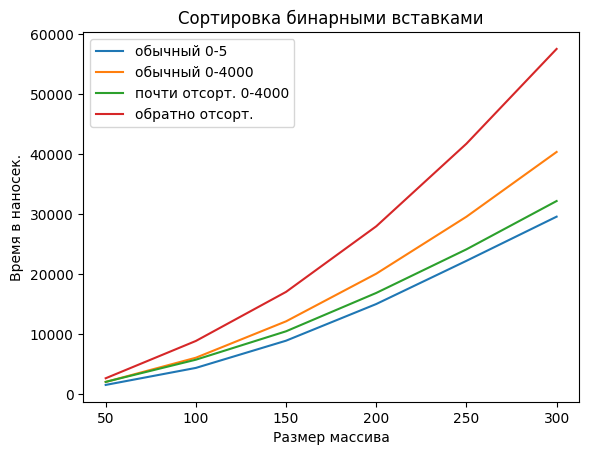

In [41]:
binaryInsertionSort = data[(data['Sorting algorithm'] == 'сортировка бинарными вставками') & (data['Array size'] <= 300)]

array_types = binaryInsertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = binaryInsertionSort[binaryInsertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка бинарными вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Заметна общая разница по времени по сравнению с сортировкой обычными вставками, так как поиск для вставки осуществляется методом бинарного поиска (O(logn) вместо O(n) для поиска). Худшие и лучшие случаи входных данных здесь тоже ожидаема и совпадает с сортировкой простыми вставками
## Цифровая сортировка

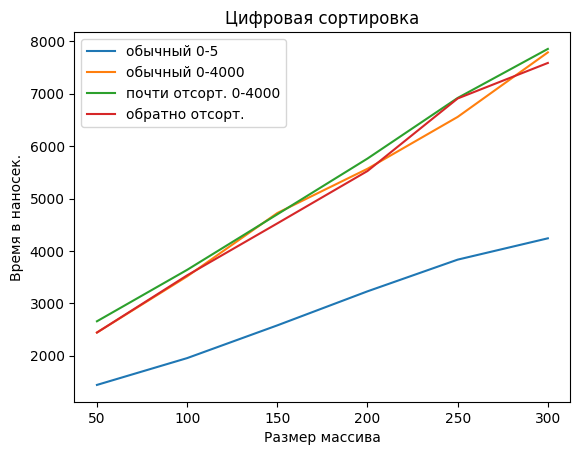

In [42]:
radixSort = data[(data['Sorting algorithm'] == 'цифровая сортировка') & (data['Array size'] <= 300)]

array_types = radixSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = radixSort[radixSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Цифровая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Цифровая сортировка в случае сортировки разрядов подсчетом имеет линейную сложность O(n + k) и судя по кривым можно сказать, что необходимый эффект достигнут несмотря на несовершенность измерений. То, что худший случай здесь как будто случайные числа от 0 до 5 - случайность и погрешность измерений. По сути разницы быть не должно
## Сортировка слиянием

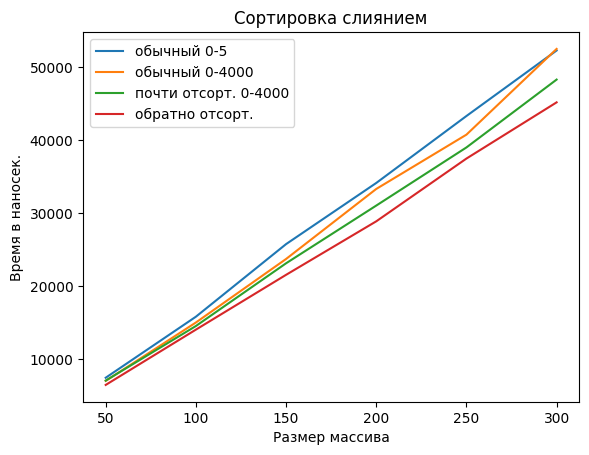

In [43]:
mergeSort = data[(data['Sorting algorithm'] == 'сортировка слиянием') & (data['Array size'] <= 300)]

array_types = mergeSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = mergeSort[mergeSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка слиянием')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Кривые очень похожие в силу того, что сортировке слиянием не важно, какой массив придет на вход. Худший случай здесь обратно отсортированный массив в силу того, что в нем произойдет больше всего обменов при слиянии массивов
## Быстрая сортировка

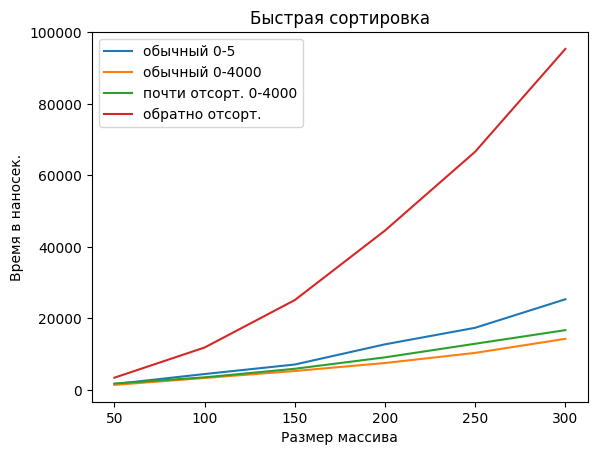

In [44]:
quickSort = data[(data['Sorting algorithm'] == 'быстрая сортировка') & (data['Array size'] <= 300)]

array_types = quickSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = quickSort[quickSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Быстрая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Худший случай для быстрой сортировки в нашей реализации с первым опорным элементов - это обратно отсортированный массив, так как нам придется двигать все элементы влево от опорного каждый раз